# 1. 导入数据

趋势组名 : temporary group\
持续时间 : 31-00:00:00\
时间间隔 : 20.00Sec\
\
MW : 发电机功率值\
3UCCSPT : 机前压力\
3U03TEA : A侧主蒸汽温\
3UZQFT : 主蒸汽流量\
3U05TE01 : 中缸进汽温度\
3U06PT04 : 再热器入口压力\
3U80FT04 : 一级减温水B侧流量\
3U80FT05 : 二级减温水A侧流量\
3U80FT09 : 再热器微量喷水A侧流量\
3U78TE02A : A空预器出口排烟温度平均值\
3U78TE02B : B空预器出口排烟温度平均值\
3UD5NAO032 : A空预器出口氧量\
30ACO0001 : A侧脱硝入口CO\
D21P61B03 : A入口NOx折算\
3U28M04AFT : 给煤机A瞬时流量\
3U28M04BFT : 给煤机B瞬时流量\
3U28M04CFT : 给煤机C瞬时流量\
3U28M04DFT : 给煤机D瞬时流量\
3U71MCV07AK : A角二次风总门开度\
3U71MCV07BK : B角二次风总门开度\
3U71MCV07CK : C角二次风总门开度\
3U71MCV07DK : D角二次风总门开度\
3USOFABJ1ZT : A角燃尽风门摆动度\
3UTAFF : 送风机总风量\
3U72PT04 : 空预器出口一次风母管压力\
3UBCFHHTL : B侧空预器出口飞灰含碳量

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
data = pd.read_csv('DATA3.csv', sep=';', header=0)
data = data.iloc[79702:]
data.shape

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_11544\584483828.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('DATA3.csv', sep=';', header=0)


(54219, 27)

# 2. 检查数据类型

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54219 entries, 79702 to 133920
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   日期           54219 non-null  object 
 1   时间           54219 non-null  object 
 2   MW           54219 non-null  float64
 3   3UCCSPT      54219 non-null  float64
 4   3U03TEA      54219 non-null  float64
 5   3UZQFT       54219 non-null  float64
 6   3U05TE01     54219 non-null  float64
 7   3U06PT04     54219 non-null  float64
 8   3U80FT04     54219 non-null  float64
 9   3U80FT05     54219 non-null  float64
 10  3UTAFF       54219 non-null  float64
 11  3U72PT04     54219 non-null  float64
 12  3UBCFHHTL    54219 non-null  float64
 13  3UD5NAO032   54219 non-null  float64
 14  3U28M04AFT   54219 non-null  float64
 15  3U28M04BFT   54219 non-null  float64
 16  3U28M04CFT   54219 non-null  float64
 17  3U28M04DFT   54219 non-null  float64
 18  3U71MCV07AK  54219 non-null  float64
 19 

In [4]:
data['DATETIME'] = pd.to_datetime(data['日期'] + ' ' + data['时间'], format='%d/%m/%Y %H:%M:%S')

In [5]:
data = data.drop(columns=['日期', '时间'])

In [6]:
data['30ACO0001'] = data['30ACO0001'].replace({',': ''}, regex=True).astype(float)
data['D21P61B03'] = data['D21P61B03'].replace({',': ''}, regex=True).astype(float)

In [7]:
print(data.dtypes)

MW                    float64
3UCCSPT               float64
3U03TEA               float64
3UZQFT                float64
3U05TE01              float64
3U06PT04              float64
3U80FT04              float64
3U80FT05              float64
3UTAFF                float64
3U72PT04              float64
3UBCFHHTL             float64
3UD5NAO032            float64
3U28M04AFT            float64
3U28M04BFT            float64
3U28M04CFT            float64
3U28M04DFT            float64
3U71MCV07AK           float64
3U71MCV07BK           float64
3U71MCV07CK           float64
3U71MCV07DK           float64
3USOFABJ1ZT           float64
3U78TE02A             float64
3U78TE02B             float64
30ACO0001             float64
D21P61B03             float64
DATETIME       datetime64[ns]
dtype: object


# 3. 检查负值

In [8]:
data.describe()

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3U71MCV07AK,3U71MCV07BK,3U71MCV07CK,3U71MCV07DK,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME
count,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,...,54219.000000,54219.000000,54219.000000,54219.000000,54219.0,54219.000000,54219.000000,54219.000000,54219.000000,54219
mean,235.514489,16.229352,540.178396,693.547445,529.467421,2.712351,10.084475,0.412632,197.109620,3.358289,...,100.578445,100.075237,100.292559,99.756804,0.0,128.565942,132.287449,152.412328,725.238237,2024-07-25 17:23:40
min,125.911000,12.744000,505.195000,398.288000,504.741000,1.560000,1.263000,0.000000,111.789000,-0.094000,...,100.488000,99.870000,100.195000,99.609000,0.0,107.885000,108.882000,7.934000,228.565000,2024-07-19 10:47:20
25%,226.805500,16.227000,538.916000,664.762000,527.764500,2.595000,7.666000,0.000000,184.206500,3.295000,...,100.553000,100.033000,100.260000,99.740000,0.0,126.947000,129.757000,124.733000,584.908000,2024-07-22 14:05:30
50%,241.964000,16.528000,540.757000,712.038000,530.546000,2.789000,10.191000,0.624000,206.576000,3.382000,...,100.586000,100.065000,100.293000,99.772000,0.0,129.285000,132.908000,142.814000,636.472000,2024-07-25 17:23:40
75%,259.919000,16.577000,542.248000,765.527000,532.260000,2.981000,12.424000,0.704000,218.341500,3.428000,...,100.618000,100.130000,100.326000,99.772000,0.0,131.032000,135.003000,166.845000,668.827500,2024-07-28 20:41:50
max,272.190000,16.846000,549.848000,821.677000,537.183000,3.167000,21.746000,3.362000,246.092000,3.807000,...,100.716000,100.391000,100.391000,99.870000,0.0,137.810000,142.589000,1001.221000,3512.111000,2024-08-01 00:00:00
std,32.479840,0.650332,3.116870,94.233062,4.170280,0.363029,3.400483,0.368125,30.901587,0.124477,...,0.040710,0.078307,0.028869,0.040306,0.0,4.138374,3.949001,67.840781,450.604102,NaN


In [9]:
negative_counts = (data.drop(columns=['DATETIME']) < 0).sum()
negative_counts

MW                 0
3UCCSPT            0
3U03TEA            0
3UZQFT             0
3U05TE01           0
3U06PT04           0
3U80FT04           0
3U80FT05           0
3UTAFF             0
3U72PT04          32
3UBCFHHTL          0
3UD5NAO032         0
3U28M04AFT     13262
3U28M04BFT         0
3U28M04CFT      1355
3U28M04DFT       368
3U71MCV07AK        0
3U71MCV07BK        0
3U71MCV07CK        0
3U71MCV07DK        0
3USOFABJ1ZT        0
3U78TE02A          0
3U78TE02B          0
30ACO0001          0
D21P61B03          0
dtype: int64

In [10]:
data.loc[:, data.columns != 'DATETIME'] = data.loc[:, data.columns != 'DATETIME'].clip(lower=0)

In [11]:
zero_counts = data.drop(columns=['DATETIME']).apply(lambda col: (col == 0).sum())
zero_counts

MW                 0
3UCCSPT            0
3U03TEA            0
3UZQFT             0
3U05TE01           0
3U06PT04           0
3U80FT04           0
3U80FT05       21837
3UTAFF             0
3U72PT04          32
3UBCFHHTL          0
3UD5NAO032         0
3U28M04AFT     13262
3U28M04BFT         0
3U28M04CFT      1359
3U28M04DFT       368
3U71MCV07AK        0
3U71MCV07BK        0
3U71MCV07CK        0
3U71MCV07DK        0
3USOFABJ1ZT    54219
3U78TE02A          0
3U78TE02B          0
30ACO0001          0
D21P61B03          0
dtype: int64

# 4. 数据预处理

In [12]:
data.describe()

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3U71MCV07AK,3U71MCV07BK,3U71MCV07CK,3U71MCV07DK,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME
count,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,54219.000000,...,54219.000000,54219.000000,54219.000000,54219.000000,54219.0,54219.000000,54219.000000,54219.000000,54219.000000,54219
mean,235.514489,16.229352,540.178396,693.547445,529.467421,2.712351,10.084475,0.412632,197.109620,3.358325,...,100.578445,100.075237,100.292559,99.756804,0.0,128.565942,132.287449,152.412328,725.238237,2024-07-25 17:23:40
min,125.911000,12.744000,505.195000,398.288000,504.741000,1.560000,1.263000,0.000000,111.789000,0.000000,...,100.488000,99.870000,100.195000,99.609000,0.0,107.885000,108.882000,7.934000,228.565000,2024-07-19 10:47:20
25%,226.805500,16.227000,538.916000,664.762000,527.764500,2.595000,7.666000,0.000000,184.206500,3.295000,...,100.553000,100.033000,100.260000,99.740000,0.0,126.947000,129.757000,124.733000,584.908000,2024-07-22 14:05:30
50%,241.964000,16.528000,540.757000,712.038000,530.546000,2.789000,10.191000,0.624000,206.576000,3.382000,...,100.586000,100.065000,100.293000,99.772000,0.0,129.285000,132.908000,142.814000,636.472000,2024-07-25 17:23:40
75%,259.919000,16.577000,542.248000,765.527000,532.260000,2.981000,12.424000,0.704000,218.341500,3.428000,...,100.618000,100.130000,100.326000,99.772000,0.0,131.032000,135.003000,166.845000,668.827500,2024-07-28 20:41:50
max,272.190000,16.846000,549.848000,821.677000,537.183000,3.167000,21.746000,3.362000,246.092000,3.807000,...,100.716000,100.391000,100.391000,99.870000,0.0,137.810000,142.589000,1001.221000,3512.111000,2024-08-01 00:00:00
std,32.479840,0.650332,3.116870,94.233062,4.170280,0.363029,3.400483,0.368125,30.901587,0.123469,...,0.040710,0.078307,0.028869,0.040306,0.0,4.138374,3.949001,67.840781,450.604102,NaN


In [13]:
nox = data["D21P61B03"] #NOx浓度
co = data["30ACO0001"] #CO浓度
atem = data["3U78TE02A"] #A排烟温度
btem = data["3U78TE02B"] #B排烟温度
o2 = data["3UD5NAO032"] #省煤器出口氧量
load = data["MW"] #机组负荷

## NOx

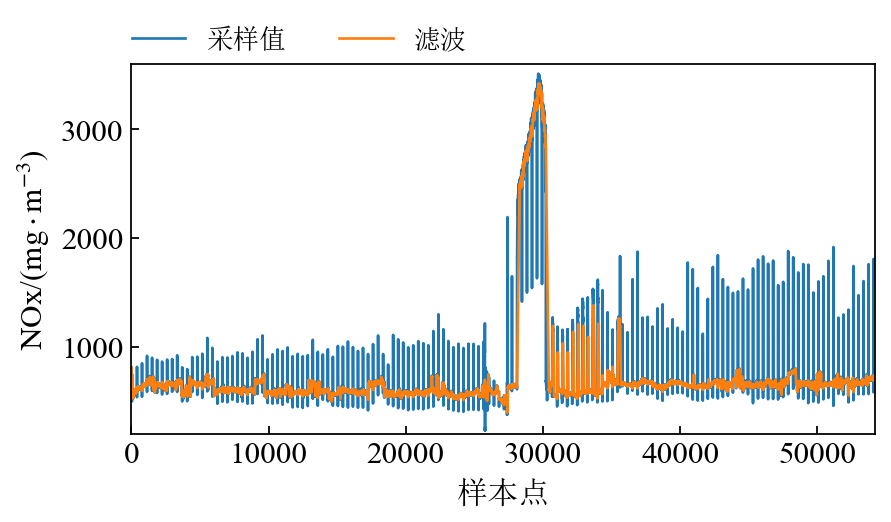

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": "times new roman",
    "font.size": 14,
    "mathtext.fontset": "stix",
    "xtick.direction": "in",
    "ytick.direction": "in",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))
linesyle_list = ['-', '-', '--', ':']


'''
定义画图可视化模版
'''
def plot_curve(data: dict):
    fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=160)
    for i in range(len(data["x"])):
        ax.plot(data["x"][i],
                data["y"][i],
                color=color_list[i+1],
                linestyle=linesyle_list[i],
                linewidth=1.2)

    if data.get("ylim"):
        ax.set_ylim(data["ylim"])
    else:
        ax.set_ylim([np.percentile(data["y"][i], 0.5), np.percentile(data["y"][i], 99.5)])
    if data.get("xlim"):
        ax.set_xlim(data["xlim"])
    if data.get("xlabel"):
        ax.set_xlabel(data["xlabel"], {"family":"SimSun"})
    if data.get("ylabel"):
        ax.set_ylabel(data["ylabel"], {"family":"times new roman"})
    if data.get("xticks"):
        ax.set_xticks(data["xticks"])
    if data.get("legend"):
        legend_font = {"family": "SimSun", "size": 12}
        fig.legend(data["legend"], frameon=False, bbox_to_anchor=(0.5, 1.01), ncol=2, prop=legend_font)
    plt.show()

from filter import *
nox_data_valider = DataValid(min_value=200, max_value=3600, step_limit=2, step_value=10)
nox_data_filter = MedianFilter(kernel_size=5)

nox_valid = nox_data_valider.apply(np.array(nox))
nox_filter = nox_data_filter.apply(nox_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [nox, nox_filter],
    "ylim": [200, 3600],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "NOx/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["采样值", "滤波"],
}

plot_curve(curve_data)

## CO

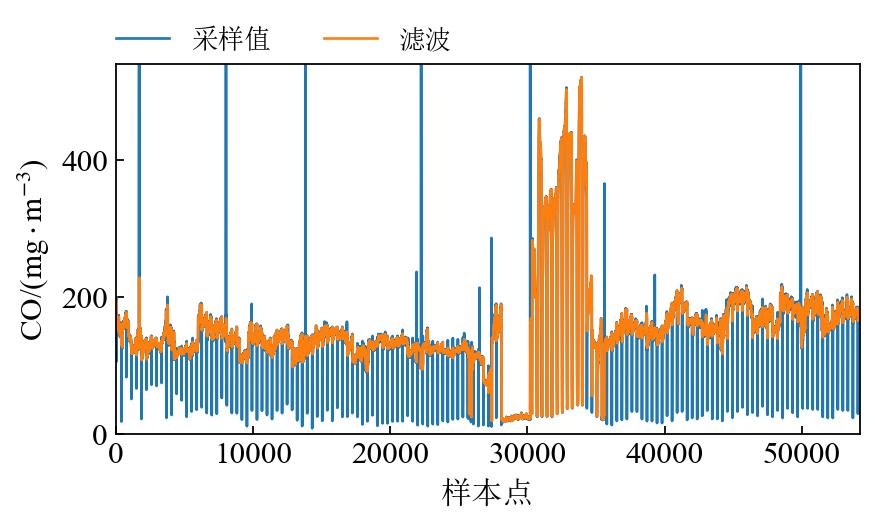

In [15]:
co_data_valider = DataValid(min_value=0, max_value=540, step_limit=10, step_value=10)
co_data_filter = MedianFilter(kernel_size=5)

co_valid = co_data_valider.apply(np.array(co))
co_filter = co_data_filter.apply(co_valid)

curve_data = {
    "x": [np.arange(len(nox_filter)), np.arange(len(nox_filter))],
    "y": [co, co_filter],
    "ylim": [0, 540],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "CO/($\mathrm{mg \cdot m^{-3}}$)",
    "legend": ["采样值", "滤波"],
}

plot_curve(curve_data)

## ATEM

In [16]:
def print_distribution(data, points=[0.1,1,2,3,97,98,99,99.9]):
    for point in points:
        print(f"分位数{point}:",np.percentile(data, point))
    data_inc = (np.roll(data, -1) - data)[:-1]
    for point in points:
        print(f"增量分位数{point}:",np.percentile(data_inc, point))

print_distribution(np.array(atem), points=[0.5,1,2,3,95,97,98,99,99.5])    

分位数0.5: 114.47976
分位数1: 115.58518
分位数2: 116.38136
分位数3: 117.49308
分位数95: 134.0052
分位数97: 134.797
分位数98: 135.12763999999999
分位数99: 135.541
分位数99.5: 135.996
增量分位数0.5: -0.21999999999999886
增量分位数1: -0.19599999999999795
增量分位数2: -0.17099999999999227
增量分位数3: -0.1560000000000059
增量分位数95: 0.1389999999999958
增量分位数97: 0.1599999999999966
增量分位数98: 0.17500000000001137
增量分位数99: 0.20199999999999818
增量分位数99.5: 0.23199999999999932


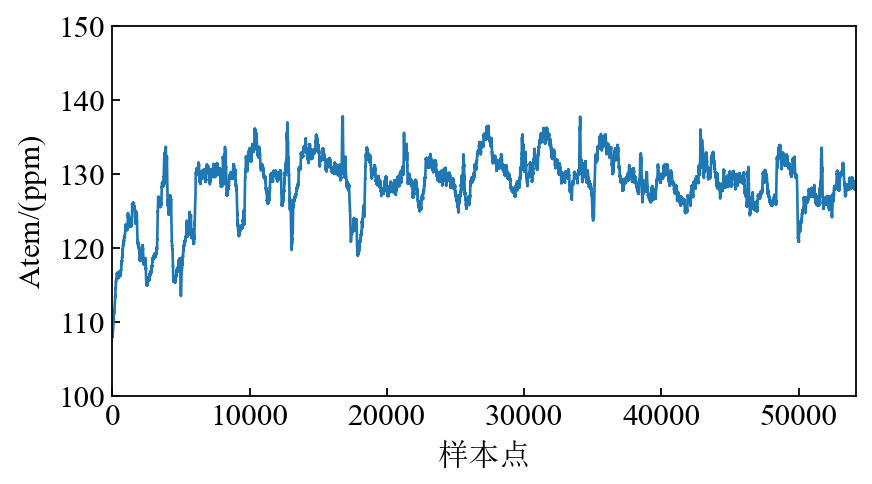

In [17]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [atem],
    "ylim": [100, 150],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Atem/($\mathrm{ppm}$)",
}

plot_curve(curve_data)

## BTEM

In [18]:
print_distribution(np.array(btem), points=[0.5,1,2,3,95,97,98,99,99.5])    

分位数0.5: 118.18609000000001
分位数1: 118.824
分位数2: 121.99888
分位数3: 123.55624
分位数95: 137.571
分位数97: 137.88345999999999
分位数98: 138.113
分位数99: 138.54146
分位数99.5: 139.10873
增量分位数0.5: -0.23599999999999
增量分位数1: -0.2109999999999961
增量分位数2: -0.1869999999999834
增量分位数3: -0.1710000000000207
增量分位数95: 0.15100000000001046
增量分位数97: 0.17499999999998295
增量分位数98: 0.19200000000000728
增量分位数99: 0.2220000000000084
增量分位数99.5: 0.2560000000000002


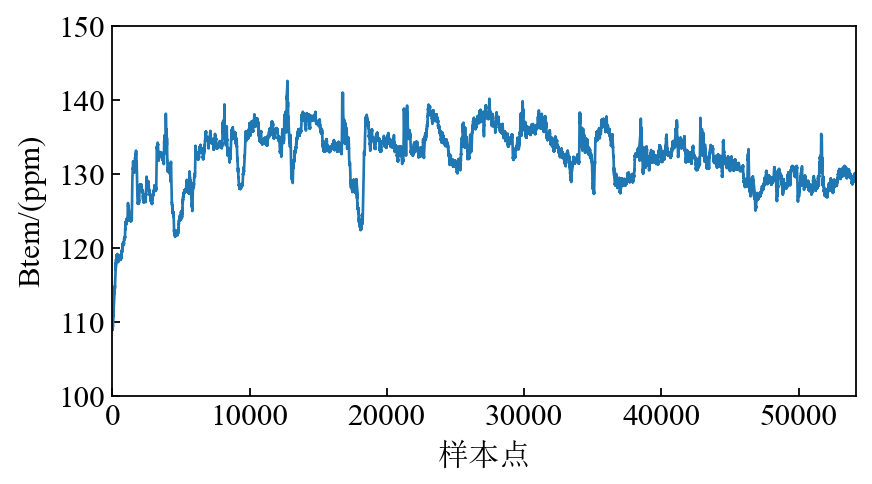

In [19]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [btem],
    "ylim": [100, 150],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Btem/($\mathrm{ppm}$)",
}

plot_curve(curve_data)

## Etem

In [20]:
Etem = (atem + btem)/2

In [21]:
print_distribution(np.array(Etem), points=[0.5,1,2,3,95,97,98,99,99.5])    

分位数0.5: 116.97640000000001
分位数1: 117.66609
分位数2: 119.64554
分位数3: 121.56385
分位数95: 135.504
分位数97: 135.91199999999998
分位数98: 136.10232000000002
分位数99: 136.72750000000002
分位数99.5: 136.999455
增量分位数0.5: -0.1744574999999982
增量分位数1: -0.15500000000002714
增量分位数2: -0.13599999999996726
增量分位数3: -0.12299999999999045
增量分位数95: 0.10899999999998045
增量分位数97: 0.12649999999997846
增量分位数98: 0.13900000000001
增量分位数99: 0.1624149999999736
增量分位数99.5: 0.18795749999998962


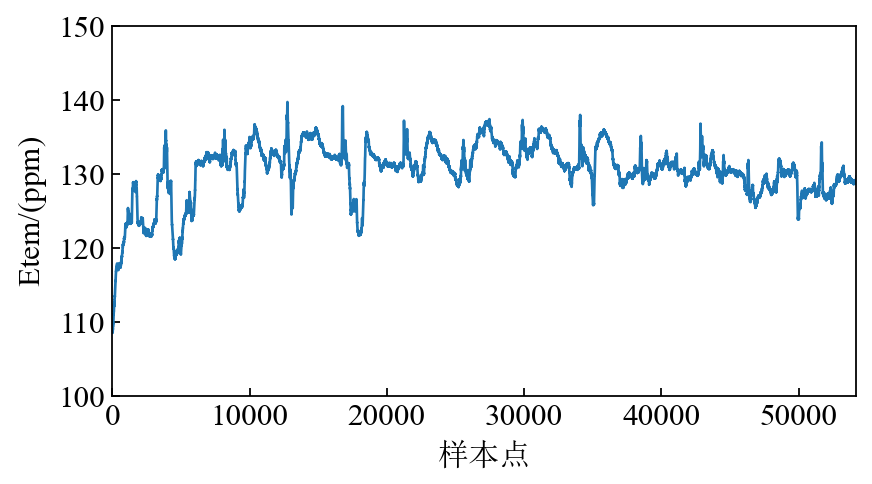

In [22]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [Etem],
    "ylim": [100, 150],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Etem/($\mathrm{ppm}$)",
}

plot_curve(curve_data)

In [23]:
Etem.min()

108.492

In [24]:
Etem.max()

139.7325

## O2

In [25]:
print_distribution(np.array(o2), points=[0.1,1,2,3,95,97,98,99,99.5])    

分位数0.1: 4.089976
分位数1: 4.440180000000001
分位数2: 4.55836
分位数3: 4.638
分位数95: 6.873
分位数97: 7.005
分位数98: 7.076
分位数99: 7.175
分位数99.5: 7.25
增量分位数0.1: -0.3309999999999995
增量分位数1: -0.20699999999999985
增量分位数2: -0.20099999999999962
增量分位数3: -0.10500000000000043
增量分位数95: 0.10299999999999976
增量分位数97: 0.10499999999999954
增量分位数98: 0.14900000000000002
增量分位数99: 0.2060000000000004
增量分位数99.5: 0.2110000000000003


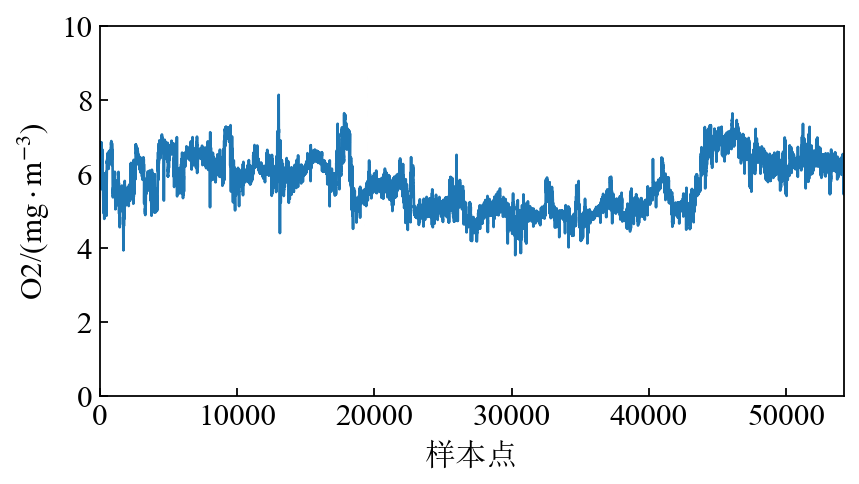

In [26]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [o2],
    "ylim": [0, 10],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "O2/($\mathrm{mg \cdot m^{-3}}$)",
}

plot_curve(curve_data)

## LOAD

In [27]:
print_distribution(np.array(load), points=[0.1,1,2,3,95,97,98,99,99.5])    

分位数0.1: 126.850218
分位数1: 134.97472
分位数2: 148.98072
分位数3: 150.579
分位数95: 265.01
分位数97: 265.561
分位数98: 270.684
分位数99: 270.947
分位数99.5: 271.078
增量分位数0.1: -4.584310999999995
增量分位数1: -2.7001499999999945
增量分位数2: -2.134999999999991
增量分位数3: -1.806490000000014
增量分位数95: 1.399000000000001
增量分位数97: 1.8740000000000092
增量分位数98: 2.2779799999999897
增量分位数99: 2.999810000000016
增量分位数99.5: 3.712999999999994


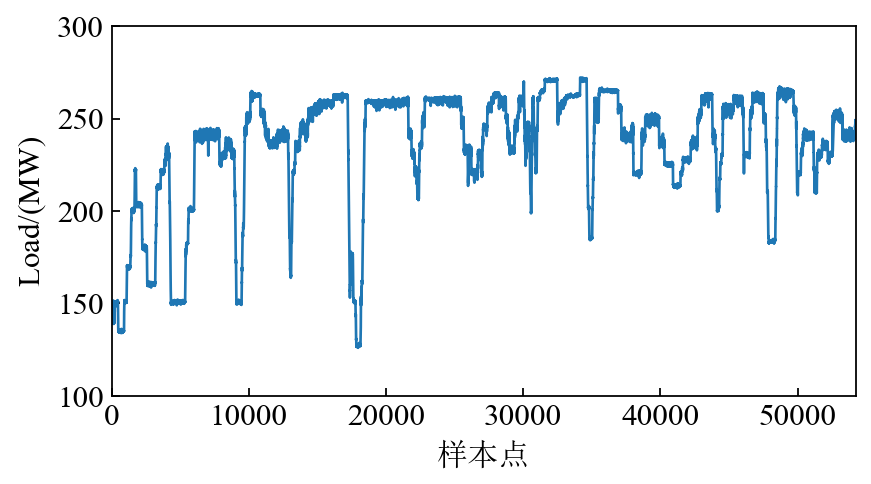

In [28]:
curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [load],
    "ylim": [100, 300],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Load/($\mathrm{MW}$)",
}

plot_curve(curve_data)

## CFH

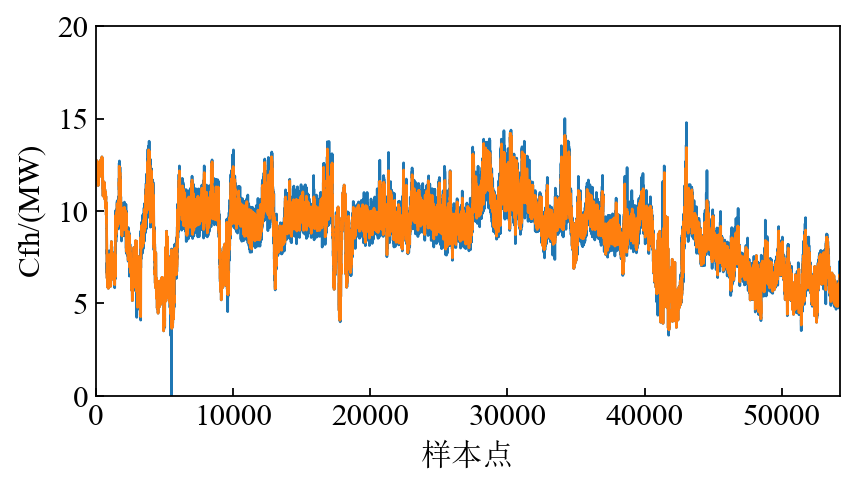

In [29]:
cfh = data["3UBCFHHTL"] #飞灰含碳量

cfh_data_valider = DataValid(min_value=2, max_value=15, step_limit=1, step_value=0.5)
cfh_data_filter = MedianFilter(kernel_size=3)

cfh_valid = cfh_data_valider.apply(np.array(cfh))
cfh_filter = cfh_data_filter.apply(cfh_valid)


curve_data = {
    "x": [np.arange(len(cfh)), np.arange(len(cfh))],
    "y": [cfh, cfh_filter],
    "ylim": [0, 20],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Cfh/($\mathrm{MW}$)",
}

plot_curve(curve_data)

# 5. 锅炉热效率计算

In [30]:
def CalculateThermalEfficiency(CO, Cfh, O2, Etem, INtem):
    Etem = (atem + btem)/2
    Mar = 7.6/100  # 收到基水分 Mt
    Mad = 2.58/100  # 空气干燥基水分 Mad
    Aar = 27.16/100  # 收到基灰分 Aar
    Qnet=20.9*1000  # 低位发热量 Qnet
    Xar2ad=(1-Mar)/(1-Mad)  # 收到基-空气干燥基转换系数
    c = Xar2ad*49.35/100
    h = Xar2ad*3.20/100
    n = Xar2ad*0.90/100
    s = Xar2ad*0.78/100
    o = 1-c-h-n-s-Mar-Aar
    ALPHA=21/(21-O2)  # 过量空气系数
    Vgk0=100*(0.089*(c+0.375*s)+0.265*h-0.0333*o)  # 理论干空气量 m^3 
    Vgy0=1.866*(c+0.375*s)+0.79*Vgk0+0.8*n  # 理论干烟气量
    Vgy=Vgy0+(ALPHA-1)*Vgk0  # 每千克燃料生成的干烟气量
    Cpy=0.8967+0.0013*(Etem)-0.000003*(Etem)*(Etem)   # 干烟气平均定压比热容 kJ/ (kg·K)
    Q2gy = Vgy*Cpy*(Etem-INtem)/Qnet  # 干烟气热损失
    V_H2O = 1.24*((9*h+Mar)+1.293*ALPHA*Vgk0*0.001)  # 烟气中水蒸气的体积
    Q_H2O = V_H2O*1.5093*(Etem-INtem)  # 干烟气热损失中水蒸气显热
    Q2H2O = Q_H2O/Qnet  # 水分热损失
    Q3 = Vgy*126.36*CO*10e-6*100/Qnet
    Q4 = 33730*Aar/Qnet*Cfh/(100-Cfh) # 飞灰含碳热损失
    Q5 = 0.035
    eff = 1 - Q2H2O - Q2gy - Q3 - Q4 - Q5# 锅炉效率 
    return eff

eff = CalculateThermalEfficiency(co_filter, cfh_filter, o2, Etem, 20)

In [31]:
eff

79702     0.866512
79703     0.866188
79704     0.865668
79705     0.865258
79706     0.865247
            ...   
133916    0.895147
133917    0.893630
133918    0.891997
133919    0.891383
133920    0.891770
Length: 54219, dtype: float64

分位数0.1: 0.8520803135281514
分位数1: 0.8602037147485878
分位数2: 0.862559974800951
分位数3: 0.8639953292480046
分位数97: 0.8989098199029041
分位数98: 0.9000665108465322
分位数99: 0.9024133080052928
分位数99.9: 0.9079795753828637
增量分位数0.1: -0.0032798772899147407
增量分位数1: -0.0023800136720751974
增量分位数2: -0.002052722910815734
增量分位数3: -0.0018577890442824318
增量分位数97: 0.0018656341162677813
增量分位数98: 0.0020695683695200638
增量分位数99: 0.0024291106283173473
增量分位数99.9: 0.003388852411266838


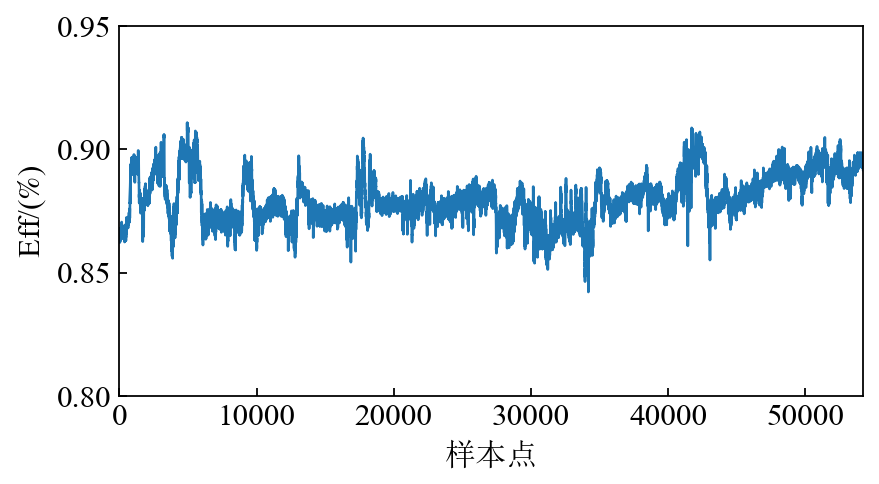

In [32]:
print_distribution(eff)

curve_data = {
    "x": [np.arange(len(nox_filter))],
    "y": [eff],
    "ylim": [0.80, 0.95],
    "xlim": [0, 54219],
    "xlabel": "样本点",
    "ylabel": "Eff/($\mathrm{\%}$)",
}

plot_curve(curve_data)

In [33]:
min_index = np.argmax(eff)
print(np.array(load)[min_index])
print(co_filter[min_index])
print(np.array(Etem)[min_index])

150.817
116.2954
120.564


# 6. 保存数据

In [34]:
def dataFrameAppend(data: pd.DataFrame, columns:dict, file_name: str):
    for key,value in columns.items():
        data[key] = value
    data.to_csv(file_name, index=False)
    
new_columns = {
    "nox_filter": nox_filter,
    "co_filter": co_filter,
    "eff": eff,
    "cfh_filter": cfh_filter,
}

dataFrameAppend(data, new_columns, file_name="DATA3_filter.csv")

In [35]:
data = pd.read_csv('DATA3_filter.csv')

In [36]:
data

,MW,3UCCSPT,3U03TEA,3UZQFT,3U05TE01,3U06PT04,3U80FT04,3U80FT05,3UTAFF,3U72PT04,...,3USOFABJ1ZT,3U78TE02A,3U78TE02B,30ACO0001,D21P61B03,DATETIME,nox_filter,co_filter,eff,cfh_filter
0,139.401,14.494,540.013,413.747,529.747,1.689,4.542,0.511,116.816,3.336,...,0.0,108.116,109.578,178.390,808.479,2024-07-19 10:47:20,808.4790,178.3900,0.866512,12.281000
1,139.419,14.494,539.870,414.968,529.968,1.689,4.542,0.511,117.079,3.366,...,0.0,108.058,109.563,175.847,586.258,2024-07-19 10:47:40,806.4790,177.8814,0.866188,12.343667
2,139.384,14.494,539.650,414.968,530.147,1.689,4.554,0.526,117.399,3.366,...,0.0,108.083,109.458,191.028,588.807,2024-07-19 10:48:00,802.4790,179.3728,0.865668,12.406333
3,139.273,14.526,540.165,414.561,530.177,1.696,4.435,0.526,117.170,3.366,...,0.0,108.027,109.447,186.527,606.679,2024-07-19 10:48:20,796.4790,181.0002,0.865258,12.469000
4,139.520,14.526,539.929,414.968,530.057,1.696,4.435,0.526,117.109,3.378,...,0.0,108.087,109.361,180.500,614.458,2024-07-19 10:48:40,788.4790,181.4222,0.865247,12.469000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54214,246.152,16.659,542.411,716.556,535.100,2.839,9.375,0.685,227.680,3.208,...,0.0,129.202,129.977,166.768,707.593,2024-07-31 23:58:40,703.2064,168.5992,0.895147,5.813000
54215,248.008,16.626,542.397,721.312,535.189,2.835,9.013,0.685,227.873,3.208,...,0.0,129.157,130.028,165.395,706.312,2024-07-31 23:59:00,705.6812,168.3246,0.893630,6.121000
54216,248.125,16.626,542.273,723.370,534.814,2.835,8.790,0.685,227.686,3.198,...,0.0,129.215,129.901,166.768,703.617,2024-07-31 23:59:20,706.0276,167.4090,0.891997,6.429000
54217,247.497,16.626,542.441,711.865,535.046,2.835,8.790,0.712,228.089,3.198,...,0.0,129.251,129.829,168.294,702.694,2024-07-31 23:59:40,705.8176,167.1038,0.891383,6.554000
